### Problem Statement
BoomBikes, a US bike-sharing provider, has experienced a significant revenue decline due to the COVID-19 pandemic. To recover, the company needs a strategic plan to boost revenue once the lockdown ends and the economy rebounds.

To prepare for post-pandemic demand, BoomBikes seeks to understand the factors influencing the demand for shared bikes. They aim to identify:

Significant variables in predicting bike demand.
How well these variables explain the demand.
The company has collected extensive data on daily bike demand across the American market based on various factors, including meteorological conditions and user behavior.

### Business Goal:
Your task is to model the demand for shared bikes using the available data. This model will help management:

Understand how demand varies with different features.
Adjust business strategies to meet demand and customer expectations.
Gain insights into the demand dynamics in a new market.

### Steps to Follow:
Data Exploration and Visualization
Data Preparation (train-test split, scaling)
Model Training
Residual Analysis
Test Set Prediction and Evaluation

#### Step 1: Reading and Understanding of data

    1. Importing the required libraries
    2. Understanding the structure of the data

In [118]:
#importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [120]:
#Reading dataset
df = pd.read_csv("day.csv")

In [122]:
#checking highlevel dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [124]:
# converting dteday column in datetime format
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [126]:
#Inspecting the data
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [128]:
#Inspect the descriptive stats
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


In [130]:
#checking for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values found. we can move on with data visualization

##### Data Visualisation

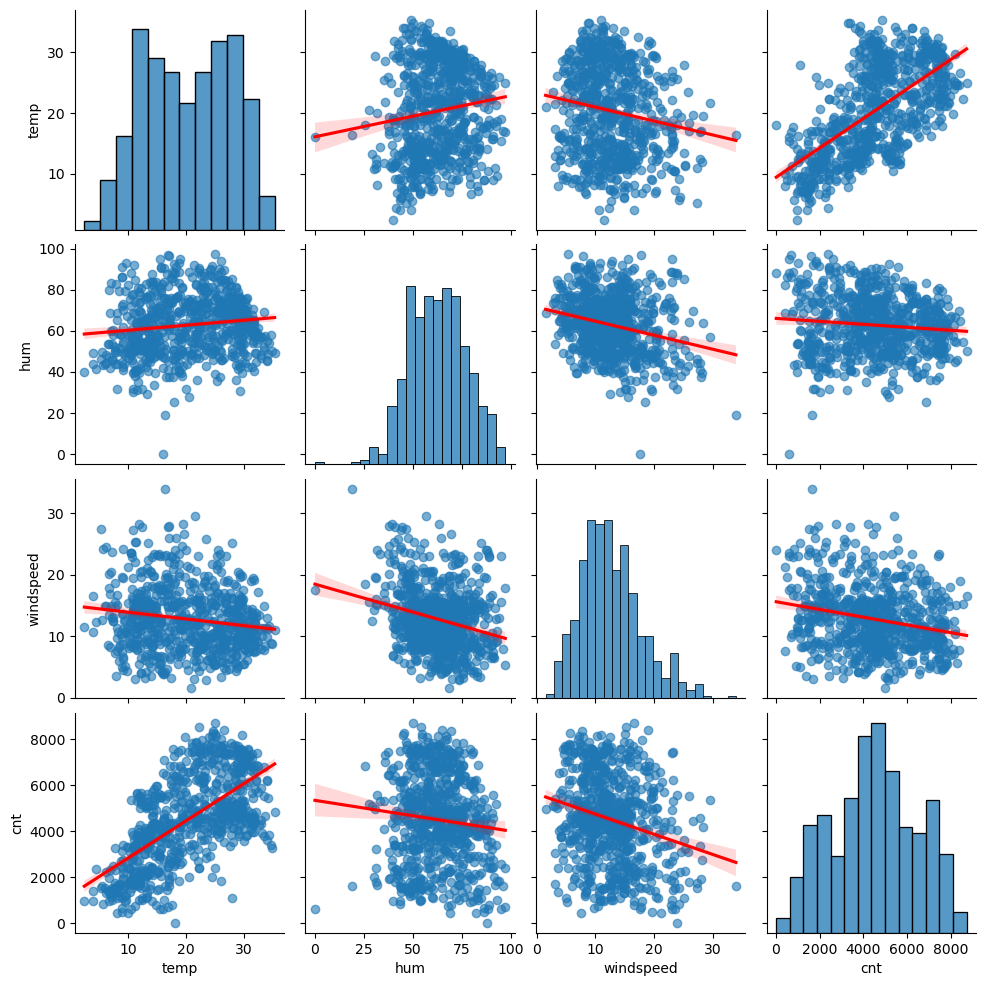

In [132]:
# Visualizing the numeric variables using pairplot with a best fit line (atemp is derivative of temp hence using only temp.)
sns.pairplot(df, vars=["temp", "hum", 'windspeed', 'cnt'], kind="reg", 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha':0.6}})
plt.show()

### Inference from Pairplot:
Temperature (temp) vs. Count (cnt): There is a strong positive linear relationship between temperature and count. As the temperature increases, the count of rentals also increases. This suggests that people are more likely to rent bikes in warmer weather.

Humidity (hum) vs. Count (cnt):There is a slight negative linear relationship between humidity and count. Higher humidity seems to correlate with a decrease in bike rentals, though the effect is not very strong.

Windspeed (windspeed) vs. Count (cnt): The relationship between wind speed and count is slightly negative, indicating that higher wind speeds may slightly decrease bike rentals. However, the relationship appears weak.

Temperature (temp) vs. Humidity (hum): There is a very weak positive relationship between temperature and humidity, suggesting that these two variables are mostly independent of each other.

Temperature (temp) vs. Windspeed (windspeed): There is a weak negative relationship between temperature and wind speed, meaning that as temperature increases, wind speed might slightly decrease.

Humidity (hum) vs. Windspeed (windspeed): The relationship between humidity and wind speed appears almost flat, suggesting no significant correlation between the two.

Overall Inference:
Temperature has the most substantial impact on bike rentals, with a clear positive correlation. Warmer temperatures drive higher rentals.
Humidity and wind speed have weaker, slightly negative correlations with bike rentals, indicating that extreme humidity and higher winds may deter people from renting bikes, but the effect is not as pronounced as with temperature.

The relationships between the environmental factors themselves (temperature, humidity, wind speed) are relatively weak, indicating that they influence bike rentals independently of each other.

This analysis suggests that weather conditions, especially temperature, play a significant role in determining bike rental activity.

## Feature Engineering

In [134]:
#Converting season and weather to strigs for easy understanding when visualizing
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


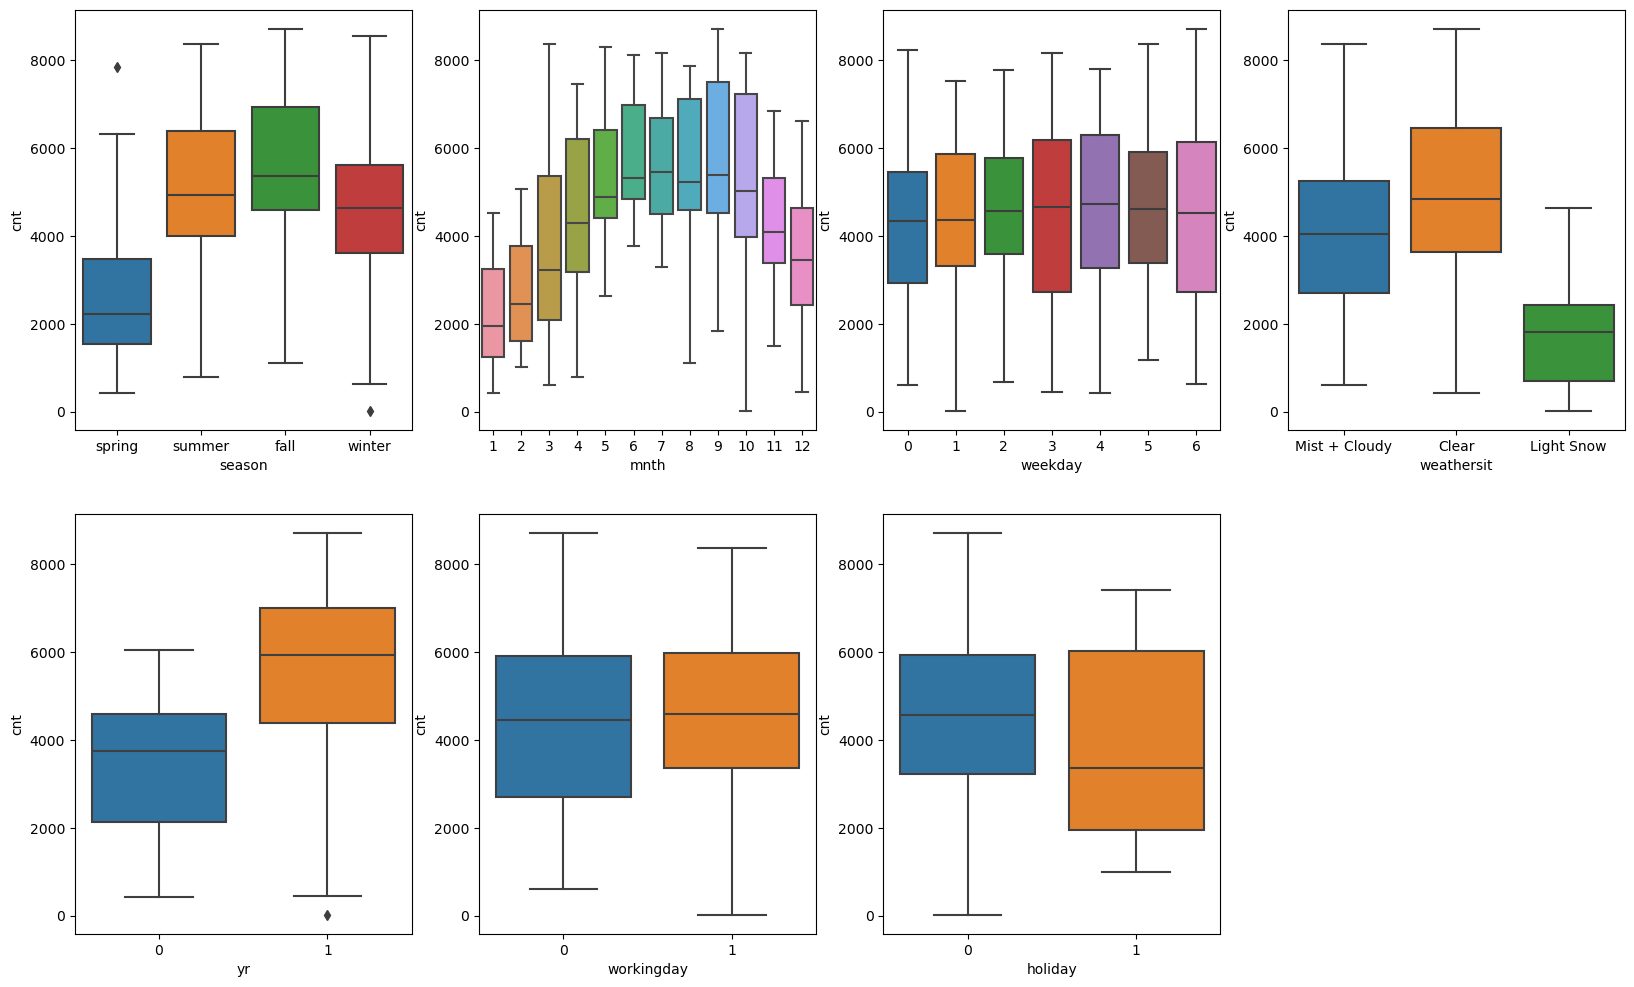

In [136]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

### Inference from boxplot:

Season: The count varies significantly across seasons. Spring has the lowest median count, while summer and fall have higher counts, and winter has a moderate count. This suggests seasonality affects bike rentals, with higher rentals in warmer months.

Month: The count increases from January to June, peaks in the middle of the year (June-July), and then decreases towards December. This pattern aligns with the seasonal trend observed, with the highest activity during the summer months.

Weekday: There is no significant difference in the median count across weekdays, indicating that bike rentals are relatively stable throughout the week.

Weather Situation: The count is highest when the weather is clear, slightly lower when it's misty or cloudy, and drops significantly during light snow conditions. This suggests that adverse weather conditions (like snow) negatively impact bike rentals.

Year: The count is higher in 2019 compared to 2018. This could indicate a growing trend in bike rentals over time.

Working Day: There seems to be a slightly higher median count on non-working days compared to working days, although the difference isn't drastic.

Holiday: The count is slightly lower on holidays compared to non-holidays, but the difference is not substantial.

Overall Inference:

Bike rentals are significantly influenced by the season and weather, with higher rentals in warmer months and clear weather conditions.
There is a noticeable increase in bike rentals over time, possibly due to growing popularity or better service.
The day of the week and holiday status have minimal impact, while the year shows a clear increase, suggesting an overall growth trend.

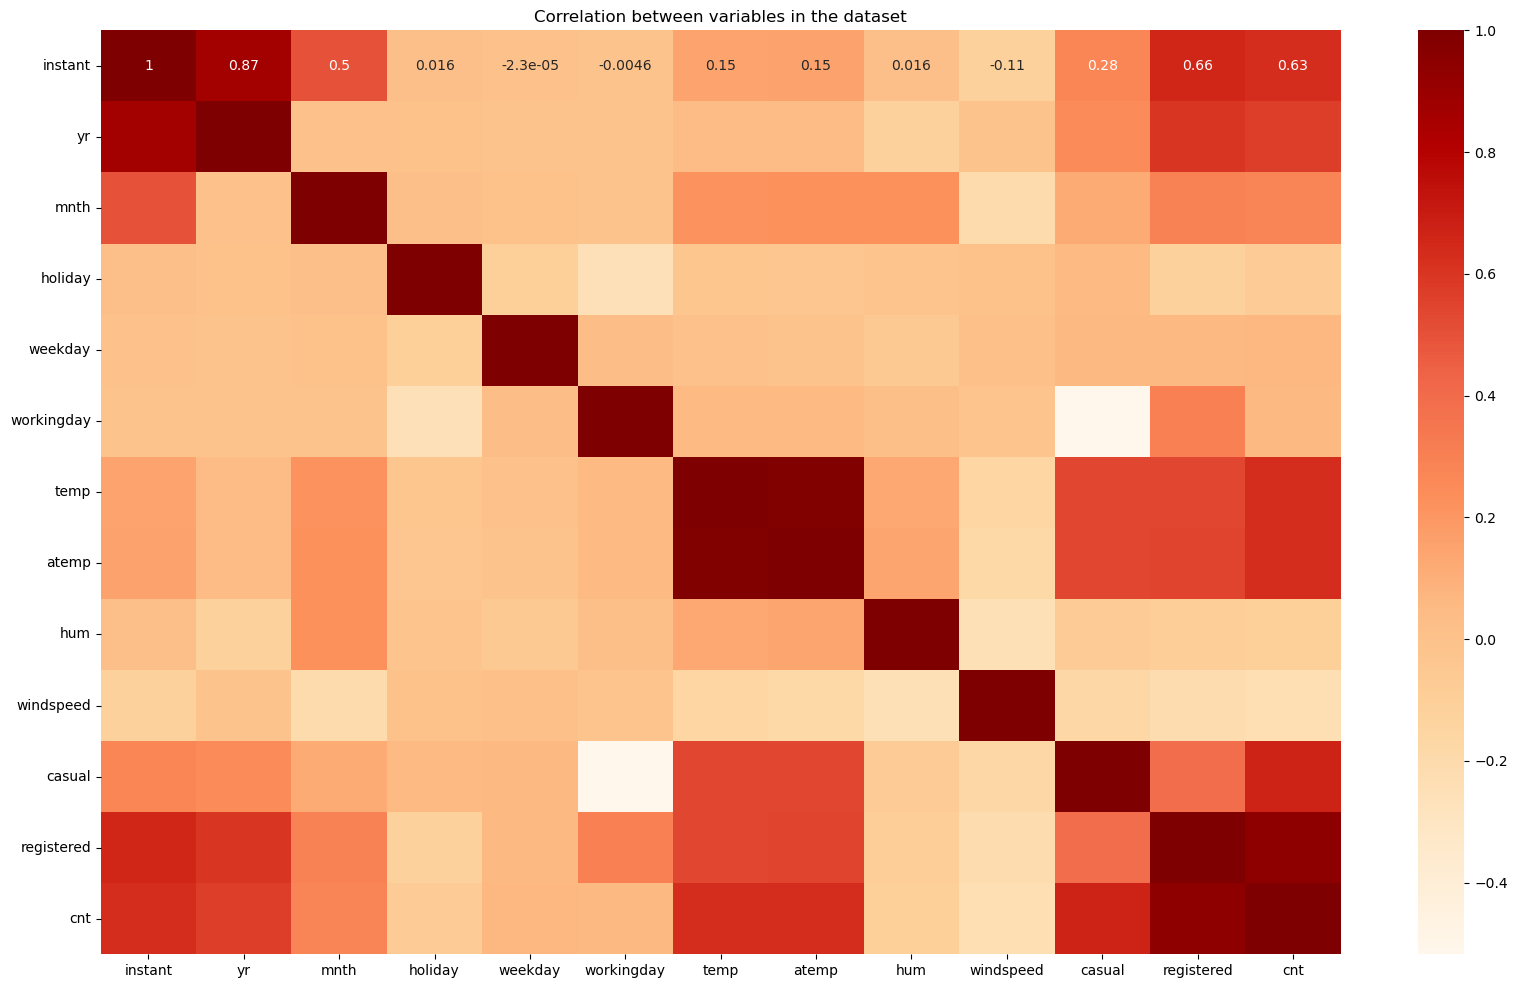

In [138]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(numeric_df.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

## Model Building

In [140]:
# Removing unnecessary variables from the dataset
# Dropping atemp, instant, dteday, casual, and registered as they are not essential for the analysis
# atemp is being excluded since temp is already being used; dteday, casual, and registered are not needed for the regression analysis

df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear,8.378268,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist + Cloudy,8.057402,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist + Cloudy,6.765000,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear,5.671653,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear,6.184153,48.2917,14.958889,1321


In [142]:
# Generate one-hot encoded variables for categorical features
# Creating dummy variables for season, month, weekday, and weather situation
season = pd.get_dummies(df.season, drop_first=True)
month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)

In [144]:
# Append the one-hot encoded variables to the original DataFrame
df = pd.concat([df, season, month, weekday, weathersit], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,11,12,1,2,3,4,5,6,Light Snow,Mist + Cloudy
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,False,False,False,False,False,False,False,True,False,True
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,False,False,False,False,False,False,False,False,False,True
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,...,False,False,True,False,False,False,False,False,False,False
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,...,False,False,False,True,False,False,False,False,False,False
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,...,False,False,False,False,True,False,False,False,False,False


In [146]:
# Remove the original categorical columns since their dummy variables have been created
df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
df.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,11,12,1,2,3,4,5,6,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,...,False,False,False,False,False,False,False,True,False,True
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,True,False,False,False,False,False
5,0,0,1,8.378268,51.8261,6.000868,1606,True,False,False,...,False,False,False,False,False,True,False,False,False,False
6,0,0,1,8.057402,49.8696,11.304642,1510,True,False,False,...,False,False,False,False,False,False,True,False,False,True
7,0,0,0,6.765000,53.5833,17.875868,959,True,False,False,...,False,False,False,False,False,False,False,True,False,True
8,0,0,0,5.671653,43.4167,24.250650,822,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,0,0,1,6.184153,48.2917,14.958889,1321,True,False,False,...,False,False,True,False,False,False,False,False,False,False


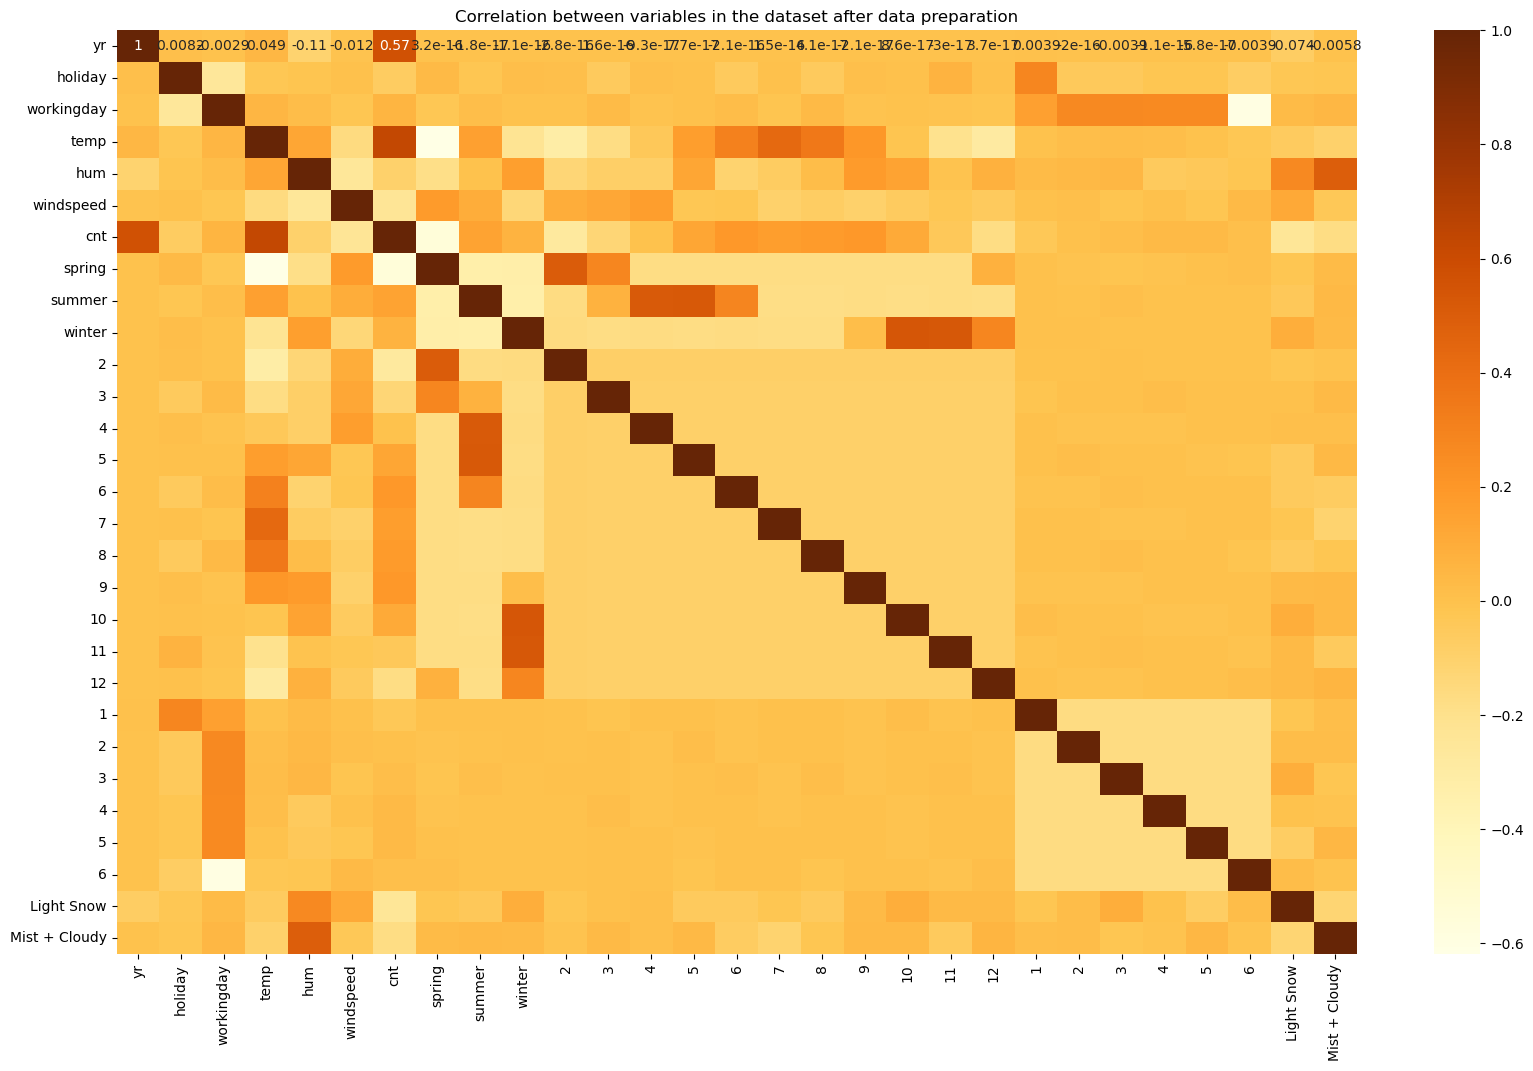

In [148]:
# Generate a heatmap to display the correlation between the updated variables
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True)
plt.title('Correlation between variables in the dataset after data preparation')
plt.show()

#### Step 2: Data Preparation for Model Training (Splitting Data and Rescaling)

In [283]:
# Divide the dataset into training and testing sets
df_train, df_test = train_test_split(df, train_size=0.6, random_state=100)

In [285]:
#Shape of the training set
df_train.shape

(438, 29)

In [207]:
#Shape of the test set
df_test.shape

(292, 29)

##### Scaling the variables

In [287]:
# Normalize the variables with larger values compared to others in the dataset
# Rescale 'hum', 'temp', 'windspeed', and 'cnt' using MinMaxScaler to standardize them
scaler = MinMaxScaler()
scaler_var = ['hum', 'temp', 'windspeed', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [289]:
# Examine the scaled values in the training set to verify normalization
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.481735,0.020548,0.691781,0.536497,0.648666,0.325728,0.500916
std,0.500238,0.142027,0.462286,0.232347,0.148186,0.173348,0.227999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332683,0.535208,0.198171,0.321531
50%,0.000000,0.000000,1.000000,0.529061,0.653070,0.305693,0.503164
75%,1.000000,0.000000,1.000000,0.730477,0.756869,0.418422,0.669466
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The scaling has worked as intended. The variables temp, hum, windspeed, and cnt have been successfully rescaled to the [0, 1] range, and are appropriate for input into our model.

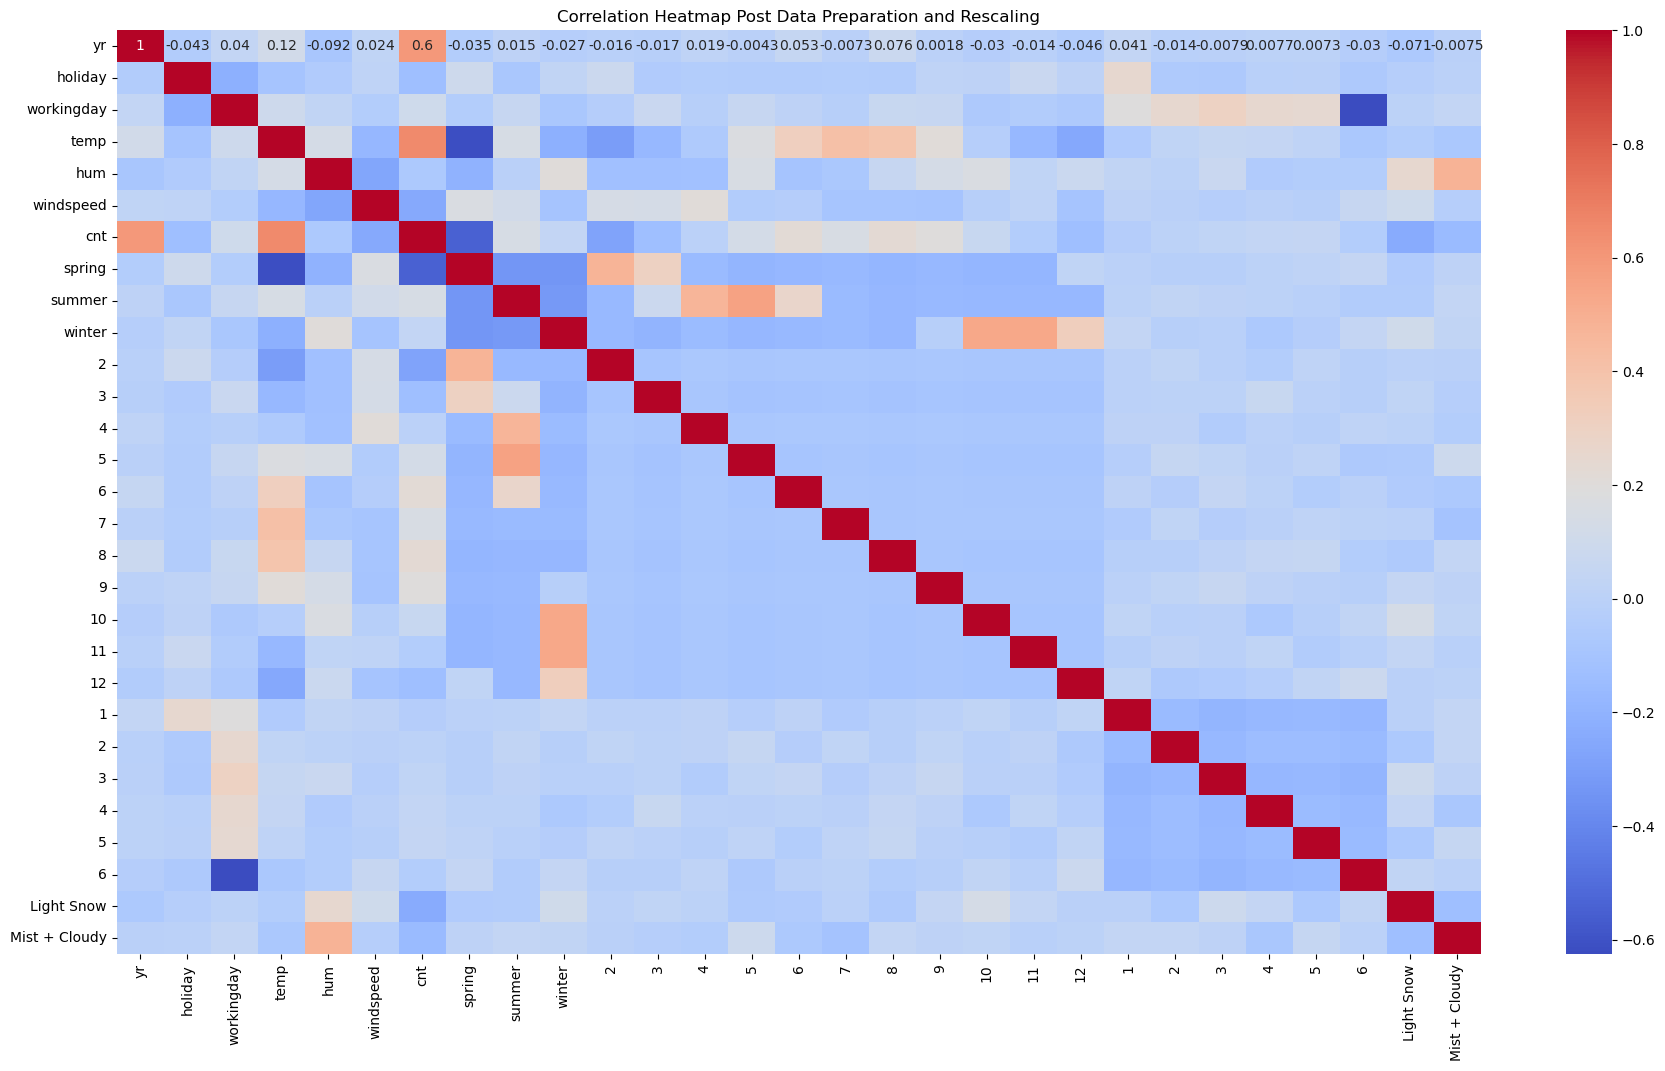

In [291]:
# Visualize correlation coefficients to identify highly correlated variables after data preparation and rescaling

plt.figure(figsize=(22, 12))
sns.heatmap(df_train.corr(), cmap="coolwarm", annot=True)
plt.title('Correlation Heatmap Post Data Preparation and Rescaling')
plt.show()

yr and temp are the most influential variables positively correlated with the target variable cnt, while certain weather conditions like Light Snow are negatively correlated. The lack of strong off-diagonal correlations indicates that most variables are not highly interdependent, which is favorable for regression analysis.

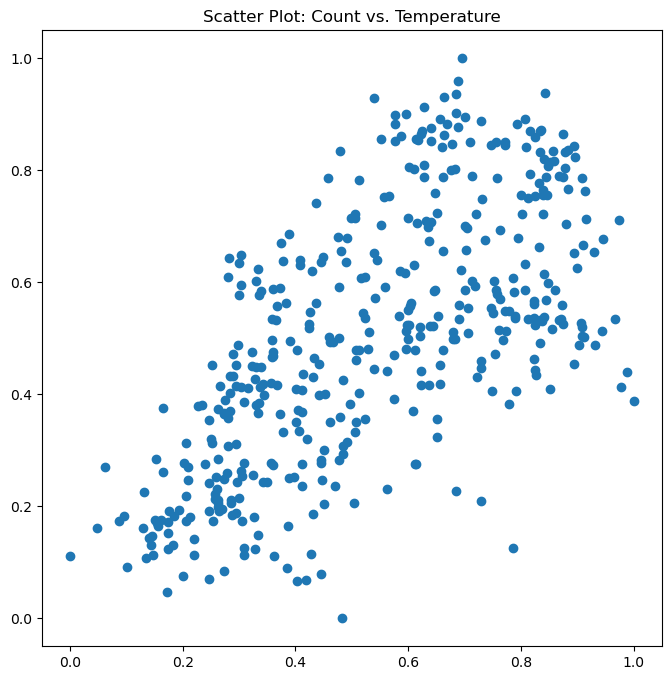

In [293]:
# Visualize the relationship between temperature and count using a scatter plot
plt.figure(figsize=[8, 8])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Scatter Plot: Count vs. Temperature')
plt.show()

#### Step 3: Training the model

In [295]:
# Prepare variables for model building
# Using temperature as the predictor to build our initial model

X_train = df_train
y_train = df_train.pop('cnt')

In [219]:
#checking the variables
y_train.head(10)

27     0.131730
671    0.588587
96     0.358836
5      0.182237
270    0.446963
199    0.519903
416    0.432006
177    0.539116
166    0.430856
393    0.370571
Name: cnt, dtype: float64

In [221]:
X_train.head(10)

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2,...,11,12,1,2,3,4,5,6,Light Snow,Mist + Cloudy
27,0,0,1,0.182903,0.817219,0.174125,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
671,1,0,0,0.360114,0.506226,0.490638,False,False,True,False,...,True,False,False,False,False,False,False,True,False,True
96,0,0,1,0.479433,0.621297,0.257993,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
5,0,0,1,0.184005,0.534060,0.101602,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
270,0,0,1,0.729685,0.874624,0.228577,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
199,0,0,1,0.909192,0.670245,0.189819,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
416,1,0,1,0.289781,0.612467,0.351305,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
177,0,0,1,0.789873,0.678402,0.140347,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
166,0,0,1,0.721238,0.709317,0.352926,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
393,1,0,0,0.283032,0.320738,0.425115,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [297]:
# Create the model using temperature as the predictor
# Add a constant (intercept) to the model
X_train_sm = sm.add_constant(X_train['temp'])

# Initialize the Ordinary Least Squares (OLS) regression model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model to the training data
lr_model = lr.fit()

# Display the model parameters (coefficients)
lr_model.params


const    0.156953
temp     0.641128
dtype: float64

In [299]:
#Model stats
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     324.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.16e-54
Time:                        13:04:36   Log-Likelihood:                 148.46
No. Observations:                 438   AIC:                            -292.9
Df Residuals:                     436   BIC:                            -284.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.021      7.547      0.000       0.116       0.198
temp           0.6411      0.036     18.020      0.000       0.571       0.711
==============================================================================
Omnibus:                        4.271   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.352
Skew:                           0.096   Prob(JB):                        0.187
Kurtosis:                       2.617   Cond. No.                         5.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model indicates that temperature (temp) is a significant predictor of count (cnt), explaining about 42.7% of the variance in the data

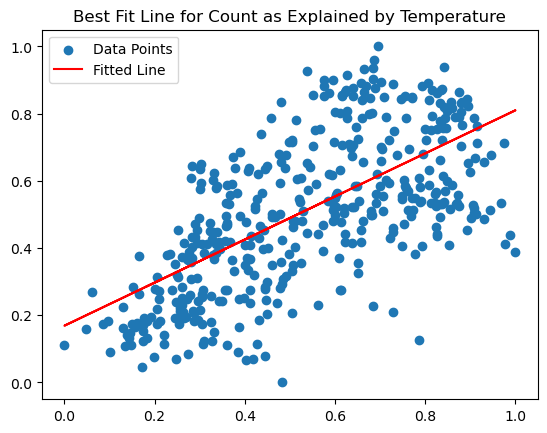

In [301]:
# Visualize the data with a scatter plot and overlay the fitted regression line to observe the best fit
plt.scatter(X_train_sm.iloc[:, 1], y_train, label='Data Points')
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r', label='Fitted Line')
plt.title('Best Fit Line for Count as Explained by Temperature')
plt.legend()
plt.show()

R-squared is 0.702 which means temperature and year explain 70% of the variance in the count data

#### RFE Not required:

Heatmap and initial analysis indicate that temp is clearly the most important therefore RFE not needed

#### Step 4: Residual analysis

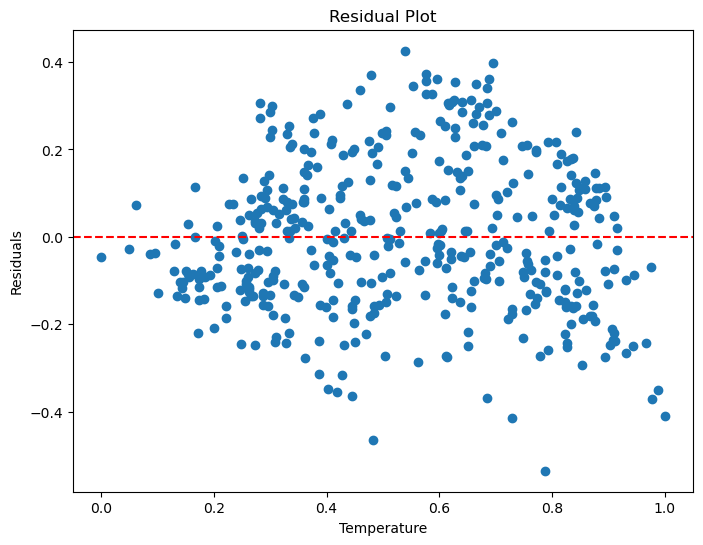

In [303]:
# Calculate the Residuals
residuals = y_train - lr_model.predict(X_train_sm)

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train_sm.iloc[:, 1], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.show()

#### The residual plot suggests that the linear regression model fits the data reasonably well

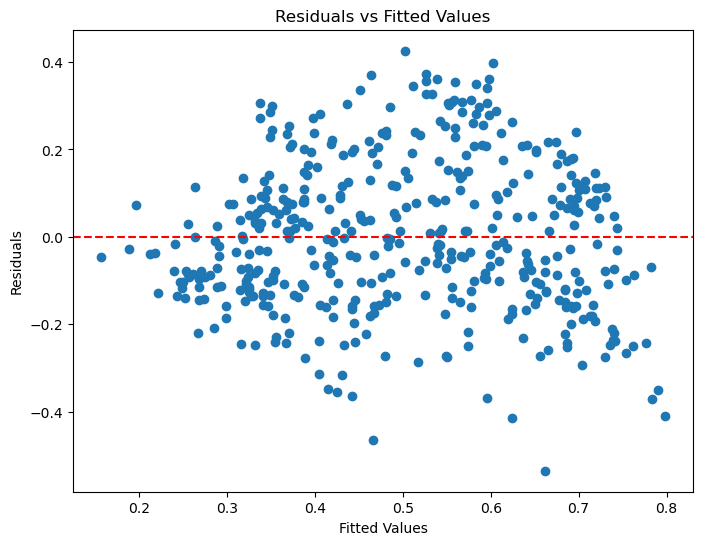

In [305]:
# Residuals vs Fitted Values Plot (Check for Homoscedasticity)
fitted_values = lr_model.predict(X_train_sm)
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

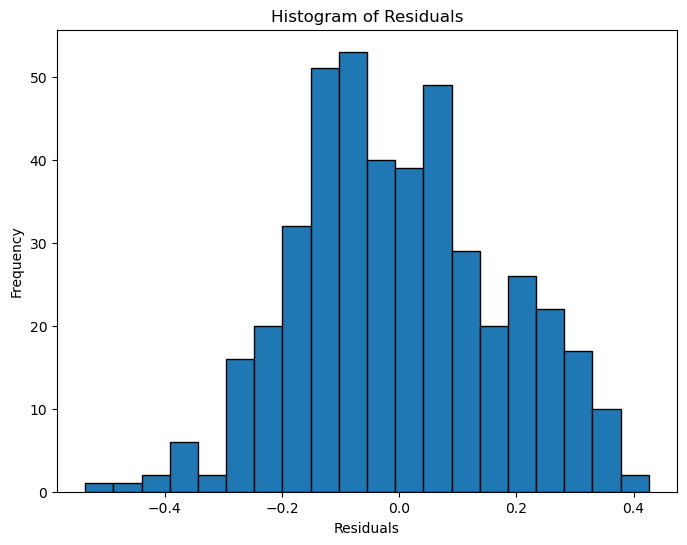

In [307]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The histogram of residuals suggests that the model’s residuals are well-behaved, being centered around zero and roughly normally distributed. This supports the validity of the model's assumptions

### Making Predictions on the testing set

In [309]:
# Rescale the testing data
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [311]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.527397,0.041096,0.671233,0.577857,0.643966,0.307897,0.538895
std,0.500106,0.198853,0.470572,0.229632,0.144690,0.155925,0.212955
min,0.000000,0.000000,0.000000,0.047379,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.376217,0.540575,0.199170,0.394184
50%,1.000000,0.000000,1.000000,0.585553,0.637827,0.289435,0.541187
75%,1.000000,0.000000,1.000000,0.779313,0.744955,0.392017,0.697107
max,1.000000,1.000000,1.000000,1.016896,1.002146,0.807474,0.981707


In [313]:
# Prepare the test set predictor variable (X_test)
X_test_sm = sm.add_constant(df_test['temp'])

In [317]:
# Make predictions on the testing set
y_test_pred = lr_model.predict(X_test_sm)

# Display the first few predictions
print(y_test_pred.head())

184    0.699242
535    0.744600
299    0.490733
221    0.731737
152    0.689764
dtype: float64


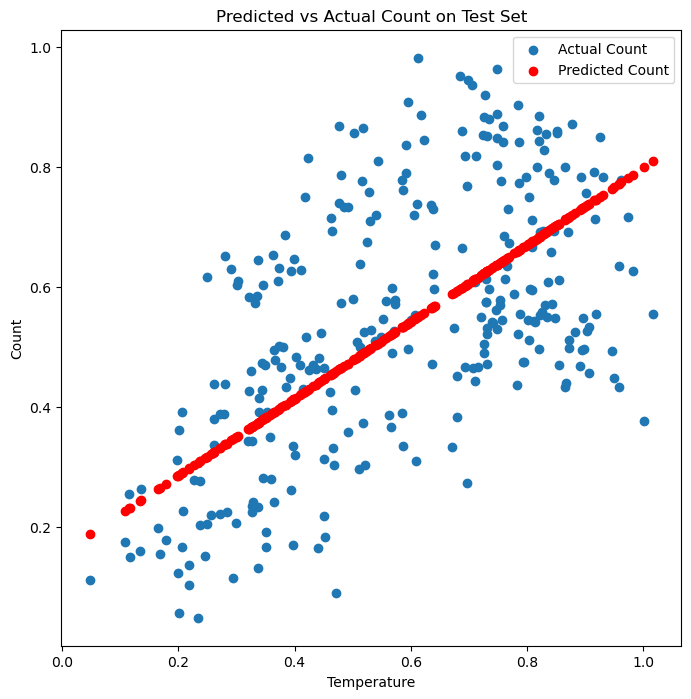

In [319]:
# Visualize the predictions against actual data
plt.figure(figsize=[8, 8])
plt.scatter(df_test['temp'], df_test['cnt'], label='Actual Count')
plt.scatter(df_test['temp'], y_test_pred, color='r', label='Predicted Count')
plt.title('Predicted vs Actual Count on Test Set')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()
plt.show()

##### We can now validate the assumptions of linear regression in the model:

As we can see, temperature has a linear relationship with the dependent variable (cnt). 

#### Step 5: Evaluation of the test set

In [327]:
# Model Evaluation: Calculate the R-squared score on the test set
r_squared = r2_score(y_test, y_test_pred)
print(f'R-squared score on the test set: {r_squared}')

R-squared score on the test set: 0.3178637280381452
